In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plantcv import plantcv as pcv
import cv2        
import os
import glob

In [2]:
org=cv2.imread("E:\\2 (1).png", 0)

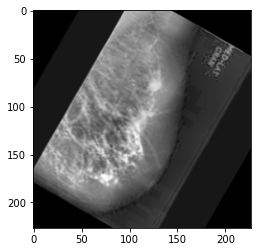

In [3]:
plt.imshow(org,cmap='gray')

Median Filtering 

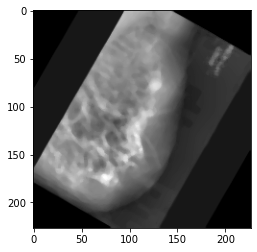

In [4]:
blur = pcv.median_blur(org, 5)
plt.imshow(blur,cmap = 'gray')

thresholding  ( global threshold)

In [5]:
ret,thresh1 = cv2.threshold(org,82,255,cv2.THRESH_BINARY)

In [36]:
ret2,th2 = cv2.threshold(org,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

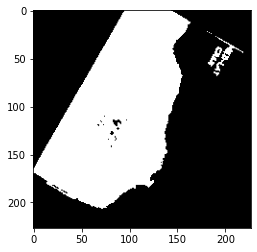

In [37]:
plt.imshow(th2, cmap='gray')

In [39]:
print(ret2)

82.0


# optimal value for thresholding is chosen automitacally. parameter ret2,th2=(0,255) is passed but in return ret2 is 82

In [8]:
print(thresh1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
print(org)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Read multiple images 

In [10]:
folder=[]
def img_read(number,loop):
    for i in range(1,loop):
        a=plt.imread("E:\\MIAS_Dataset\\"+str(number)+"\\"+str(number)+" ("+str(i)+")"+".png")
        a=np.array(a)
        folder.append(a)
    ax=np.array(folder)
    return a 

In [11]:
y=[]
def label(number,loop):  
    for i in range(loop):
        if number==1:
            y.append(1)
        if number==2:
            y.append(2)

In [12]:
one=img_read(1,5)
one=label(1,5)
two=img_read(2,5)
two=label(2,5)

In [13]:
folder=np.array(folder)
folder.shape

(8, 227, 227)

In [14]:
X=np.array(folder)

In [15]:
y=np.array(y)

In [16]:
y.shape

(10,)

In [17]:
def median(img1):
    blur = pcv.median_blur(img1, 5)
    return blur

In [42]:
def Otsu_thresholding(img1):
    #ret, thresh1 = cv2.threshold(img1, 100,200, cv2.THRESH_BINARY )
    ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return ret2,th2

In [43]:
def Original_plot(image2):
        plt.figure(figsize=(20, 15))
        plt.subplot(3,1,1)
        plt.imshow(image2,cmap = 'gray')
        plt.title('Original Noisy Image')
        plt.xticks([]), plt.yticks([])
def median_blur(blur):
        plt.figure(figsize=(20, 15))
        plt.subplot(3,1,3)
        plt.imshow(blur,cmap = 'gray')
        plt.title('Median Blur')
        plt.xticks([]), plt.yticks([])
        plt.show()
def Otsu_plot(thresh1):
        plt.figure(figsize=(20, 15))
        plt.subplot(3,1,3)
        plt.imshow(thresh1,cmap = 'gray')
        plt.title('Otsu thresholding')
        plt.xticks([]), plt.yticks([])
        plt.show()

Image  1 : 



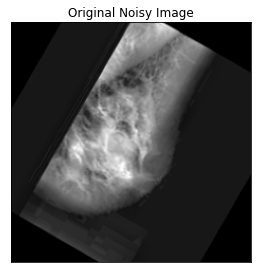

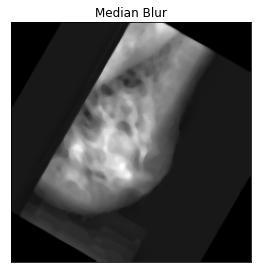

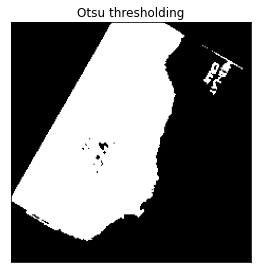

Image  2 : 



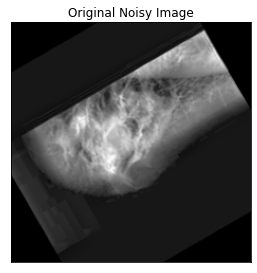

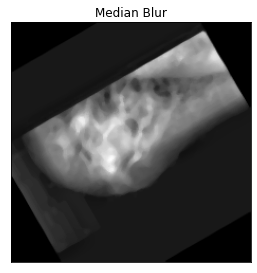

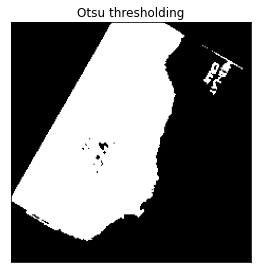

Image  3 : 



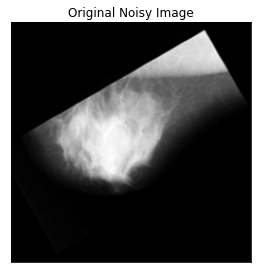

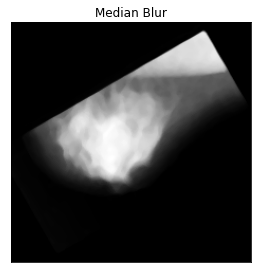

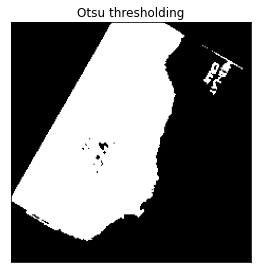

Image  4 : 



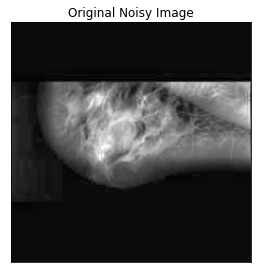

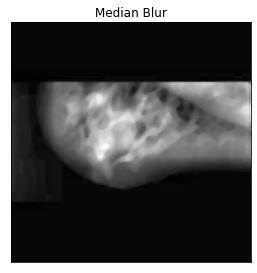

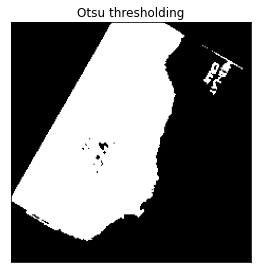

Image  5 : 



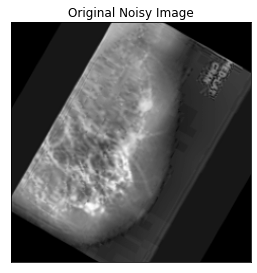

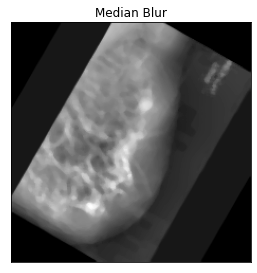

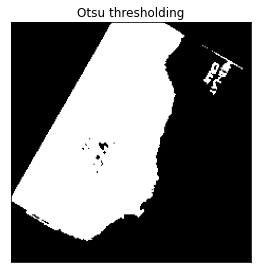

Image  6 : 



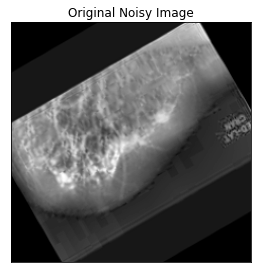

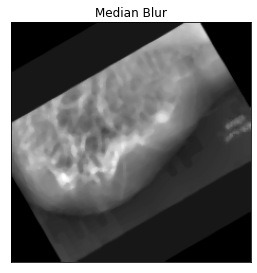

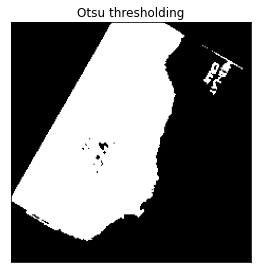

Image  7 : 



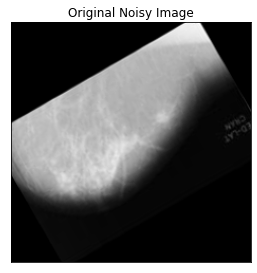

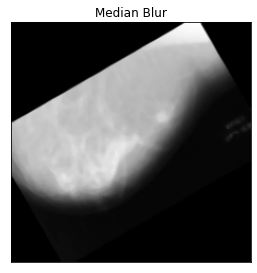

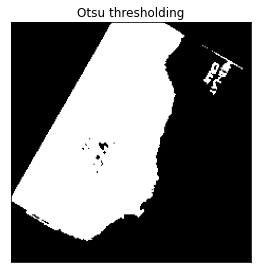

Image  8 : 



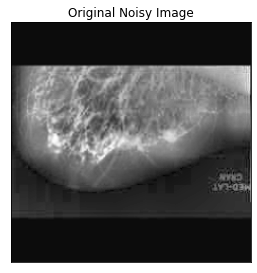

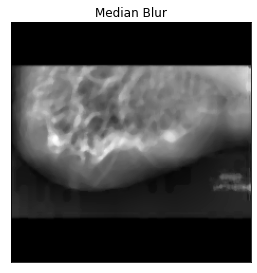

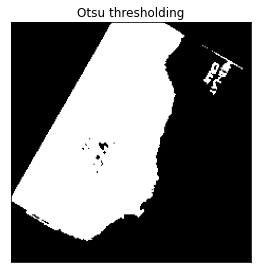

In [44]:
j=0
for i in X:
    j+=1
    print("Image ",j,": \n")
    image1 =i
    image2 =i
    
    Original_plot(image2)
    
    blur=median(image1)
    median_blur(blur)
    
    ret,thresh1=Otsu_thresholding(blur)
    Otsu_plot(thresh1)

########################################################################################

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [27]:
img=cv2.imread("E:\\2 (1).png", 0)

In [28]:
# global thresholding
ret1,th1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)

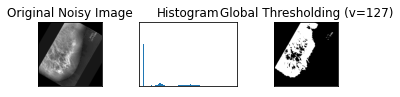

In [29]:
# plot all the images and their histograms
images = [img, 0, th1]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)']

for i in range(1):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [30]:
print(ret1)

120.0


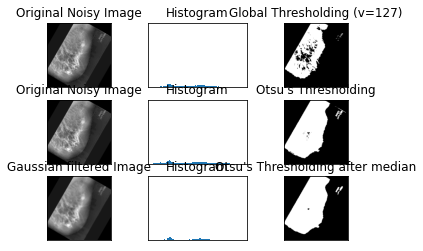

In [31]:
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,90,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.medianBlur(img,5)
ret3,th3 = cv2.threshold(blur,90,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding after median"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [32]:
print(ret2)

82.0


In [33]:
print(ret3)

82.0
